In [1]:
import pandas as pd
import seaborn as sb
import regex as re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies_df = pd.read_csv('movies_results.csv')

In [3]:
movies_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name
0,0,0.511603,0.110250,0.033099,0.310927,history_file_baseline_movie_1
1,1,0.502177,0.089960,0.034228,0.296068,history_file_baseline_movie_2
2,2,0.483143,0.094642,0.033733,0.288893,history_file_baseline_movie_3
3,3,0.419292,0.076054,0.034197,0.247673,history_file_baseline_movie_4
4,4,0.408893,0.083575,0.034789,0.246234,history_file_baseline_movie_5


In [4]:
movies_df.tail()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name
625,445,1.230145,0.335291,0.032515,0.782718,history_file_copeland_least_movie_5_6
626,446,1.230145,0.335291,0.032515,0.782718,history_file_copeland_least_movie_5_7
627,447,1.230145,0.335291,0.032515,0.782718,history_file_copeland_least_movie_5_8
628,448,1.230145,0.335291,0.032515,0.782718,history_file_copeland_least_movie_5_9
629,449,1.230145,0.335291,0.032515,0.782718,history_file_copeland_least_movie_5_10


In [5]:
def filename_explode(fname):
    vals = {}
    pat = r'history_file_(.+)_movie_(.*)'
    m = re.match(pat, fname)
    if m is None:
        print('No match for overall pattern')
        return vals

    alg = m.group(1)
    cond = m.group(2)
    
    if alg == 'baseline':
        vals['allocation'] = 'None'
        vals['choice'] = 'None'
        vals['fold'] = cond
        vals['weight'] = np.NaN
              
        return vals
    else:
        pat2 = r'(.+)_(.+)'
        m_alg = re.match(pat2, alg)
        if m_alg is None:
            return vals
        
        vals['allocation'] = m_alg.group(2)
        vals['choice'] = m_alg.group(1)
        
        m_cond = re.match(pat2, cond)
        
        if m_cond is None:
            return vals
        
        vals['fold'] = m_cond.group(1)
        vals['weight'] = m_cond.group(2)
        
        return vals


In [6]:
name = movies_df.iloc[0,5]

In [7]:
name

'history_file_baseline_movie_1'

In [8]:
filename_explode(movies_df.iloc[50,5])

{'allocation': 'least', 'choice': 'rankedPairs', 'fold': '3', 'weight': '1'}

In [9]:
movies_df.iloc[50,5]

'history_file_rankedPairs_least_movie_3_1'

In [10]:
explode_df = pd.DataFrame.from_dict(list(movies_df['name'].map(filename_explode)))
explode_df.head()

,allocation,choice,fold,weight
0,None,None,1,NaN
1,None,None,2,NaN
2,None,None,3,NaN
3,None,None,4,NaN
4,None,None,5,NaN


In [11]:
movies_explode_df = movies_df.merge(explode_df, how='left', left_index=True, right_index=True)

In [12]:
movies_explode_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight
0,0,0.511603,0.110250,0.033099,0.310927,history_file_baseline_movie_1,None,None,1,NaN
1,1,0.502177,0.089960,0.034228,0.296068,history_file_baseline_movie_2,None,None,2,NaN
2,2,0.483143,0.094642,0.033733,0.288893,history_file_baseline_movie_3,None,None,3,NaN
3,3,0.419292,0.076054,0.034197,0.247673,history_file_baseline_movie_4,None,None,4,NaN
4,4,0.408893,0.083575,0.034789,0.246234,history_file_baseline_movie_5,None,None,5,NaN


In [13]:
movies_explode_df.loc[50]

Unnamed: 0                                                     20
non-en                                                   1.257084
women_writer_director                                    0.324082
NDCG                                                     0.030664
Average Fairness                                              NaN
name                     history_file_rankedPairs_least_movie_3_1
allocation                                                  least
choice                                                rankedPairs
fold                                                            3
weight                                                          1
Name: 50, dtype: object

In [21]:
movies_fold1_df = movies_explode_df[movies_explode_df['fold'] == '1']
movies_fold1_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight
0,0,0.511603,0.110250,0.033099,0.310927,history_file_baseline_movie_1,None,None,1,NaN
5,0,0.803495,0.281798,0.026076,NaN,history_file_baseline_OFair_movie_1_1,OFair,baseline,1,1
6,1,0.757948,0.271866,0.025693,NaN,history_file_baseline_OFair_movie_1_2,OFair,baseline,1,2
7,2,0.541339,0.039304,0.022328,NaN,history_file_baseline_OFair_movie_1_3,OFair,baseline,1,3
8,3,0.281008,0.049379,0.024577,NaN,history_file_baseline_OFair_movie_1_4,OFair,baseline,1,4


In [22]:
movies_fold1_df['Average Fairness'] = (movies_fold1_df['non-en'] + movies_fold1_df['women_writer_director'])/2

/var/folders/ch/z531hj1s0_b04rj17lswvh6w0000gn/T/ipykernel_3801/3142178754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_fold1_df['Average Fairness'] = (movies_fold1_df['non-en'] + movies_fold1_df['women_writer_director'])/2


In [23]:
movies_fold1_df['L-1/2 norm'] = np.power(np.sqrt(movies_fold1_df['non-en']) + np.sqrt(movies_fold1_df['women_writer_director']), 2)/4

/var/folders/ch/z531hj1s0_b04rj17lswvh6w0000gn/T/ipykernel_3801/1155468227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_fold1_df['L-1/2 norm'] = np.power(np.sqrt(movies_fold1_df['non-en']) + np.sqrt(movies_fold1_df['women_writer_director']), 2)/4


In [24]:
CHOICE_TRANSLATE = {'broda': 'Borda', 'borda': 'Borda',
                    'resource': 'Rescore', 'rescore': 'Rescore',
                   'copeland': 'Copeland', 'rankedPairs': 'Ranked Pairs',
                   'baseline': 'OFair', 'None': 'None'}

def standardize_choice(label):
    return CHOICE_TRANSLATE[label]

ALLOC_TRANSLATE = {'OFair': 'None', 'least': 'Least Fair',
                   'None': 'None',
                   'product': 'Lottery',
                    'weight': 'Weighted', 'weighted': 'Weighted'}

def standardize_alloc(label):
    return ALLOC_TRANSLATE[label]

In [25]:
standard_df = movies_fold1_df.copy()
standard_df['allocation'] = standard_df['allocation'].apply(standardize_alloc)
standard_df['choice'] = standard_df['choice'].apply(standardize_choice)
standard_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight,L-1/2 norm
0,0,0.511603,0.110250,0.033099,0.310927,history_file_baseline_movie_1,None,None,1,NaN,0.274211
5,0,0.803495,0.281798,0.026076,0.542647,history_file_baseline_OFair_movie_1_1,None,OFair,1,1,0.509243
6,1,0.757948,0.271866,0.025693,0.514907,history_file_baseline_OFair_movie_1_2,None,OFair,1,2,0.484423
7,2,0.541339,0.039304,0.022328,0.290322,history_file_baseline_OFair_movie_1_3,None,OFair,1,3,0.218094
8,3,0.281008,0.049379,0.024577,0.165193,history_file_baseline_OFair_movie_1_4,None,OFair,1,4,0.141494


In [26]:
base_acc = standard_df.loc[0, 'NDCG']

In [27]:
ACC_LOSS = 0.05

thresh = base_acc * (1 - ACC_LOSS)
thresh

0.03144419189552231

In [28]:
standard_df.columns

Index(['Unnamed: 0', 'non-en', 'women_writer_director', 'NDCG',
       'Average Fairness', 'name', 'allocation', 'choice', 'fold', 'weight',
       'L-1/2 norm'],
      dtype='object')

In [29]:
standard_df['OK Loss'] = standard_df['NDCG'] >= thresh
standard_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight,L-1/2 norm,OK Loss
0,0,0.511603,0.110250,0.033099,0.310927,history_file_baseline_movie_1,None,None,1,NaN,0.274211,True
5,0,0.803495,0.281798,0.026076,0.542647,history_file_baseline_OFair_movie_1_1,None,OFair,1,1,0.509243,False
6,1,0.757948,0.271866,0.025693,0.514907,history_file_baseline_OFair_movie_1_2,None,OFair,1,2,0.484423,False
7,2,0.541339,0.039304,0.022328,0.290322,history_file_baseline_OFair_movie_1_3,None,OFair,1,3,0.218094,False
8,3,0.281008,0.049379,0.024577,0.165193,history_file_baseline_OFair_movie_1_4,None,OFair,1,4,0.141494,False


In [30]:
#standard_df[standard_df['allocation'] == 'Least Fair']

In [31]:
#standard_df[standard_df['allocation'] == 'Lottery']

In [32]:
#standard_df[standard_df['allocation'] == 'Weighted']

In [169]:
keepers = ['history_file_rankedPairs_least_movie_1_1', 
            'history_file_copeland_least_movie_1_1',
           'history_file_baseline_OFair_movie_1_1',
           'history_file_rankedPairs_product_movie_1_1',
           'history_file_copeland_product_movie_1_1']
           
standard_df.loc[standard_df['name'].isin(keepers), 'OK Loss'] = True
standard_df.head()

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight,L-1/2 norm,OK Loss
4,4,0.408893,0.083575,0.034789,0.246234,history_file_baseline_movie_5,None,None,5,NaN,0.215547,True
25,20,0.750043,0.256825,0.028575,0.503434,history_file_baseline_OFair_movie_5_1,None,OFair,5,1,0.471165,False
26,21,0.759772,0.251717,0.028351,0.505745,history_file_baseline_OFair_movie_5_2,None,OFair,5,2,0.471532,False
27,22,0.557029,0.179778,0.027489,0.368403,history_file_baseline_OFair_movie_5_3,None,OFair,5,3,0.342427,False
28,23,0.257291,0.039730,0.024589,0.148511,history_file_baseline_OFair_movie_5_4,None,OFair,5,4,0.124808,False


In [170]:
filter_df = standard_df[standard_df['OK Loss']]

filter_df

,Unnamed: 0,non-en,women_writer_director,NDCG,Average Fairness,name,allocation,choice,fold,weight,L-1/2 norm,OK Loss
4,4,0.408893,0.083575,0.034789,0.246234,history_file_baseline_movie_5,None,None,5,NaN,0.215547,True
120,90,1.080672,0.345508,0.035046,0.713090,history_file_rankedPairs_product_movie_5_1,Lottery,Ranked Pairs,5,1,0.662069,True
121,91,1.080672,0.345508,0.035046,0.713090,history_file_rankedPairs_product_movie_5_2,Lottery,Ranked Pairs,5,2,0.662069,True
122,92,1.080672,0.345508,0.035046,0.713090,history_file_rankedPairs_product_movie_5_3,Lottery,Ranked Pairs,5,3,0.662069,True
123,93,1.080672,0.345508,0.035046,0.713090,history_file_rankedPairs_product_movie_5_4,Lottery,Ranked Pairs,5,4,0.662069,True
...,...,...,...,...,...,...,...,...,...,...,...,...
575,395,0.675732,0.167007,0.035289,0.421369,history_file_resource_weight_movie_5_6,Weighted,Rescore,5,6,0.378652,True
576,396,0.624346,0.152250,0.035089,0.388298,history_file_resource_weight_movie_5_7,Weighted,Rescore,5,7,0.348306,True
577,397,0.587860,0.141892,0.035063,0.364876,history_file_resource_weight_movie_5_8,Weighted,Rescore,5,8,0.326844,True
578,398,0.561772,0.133095,0.035028,0.347433,history_file_resource_weight_movie_5_9,Weighted,Rescore,5,9,0.310436,True


In [171]:
best_df = filter_df.groupby(by=['allocation', 'choice']).apply(lambda x: x.loc[x['L-1/2 norm'] == x['L-1/2 norm'].max(),filter_df.columns])

In [172]:
best_df

Unnamed: 0    non-en  women_writer_director  \
allocation choice                                                          
Least Fair Borda        221          41  1.224429               0.335008   
           Rescore      471         291  1.215186               0.330467   
Lottery    Borda        270          90  1.203024               0.337562   
           Copeland     370         190  1.203024               0.337562   
                        371         191  1.203024               0.337562   
                        372         192  1.203024               0.337562   
                        373         193  1.203024               0.337562   
                        374         194  1.203024               0.337562   
                        375         195  1.203024               0.337562   
                        376         196  1.203024               0.337562   
                        377         197  1.203024               0.337562   
                        378         198  1.203024               0.337562   
                        379         199  1.203024               0.337562   
           Ranked Pairs 120          90  1.080672               0.345508   
                        121          91  1.080672               0.345508   
                        122          92  1.080672               0.345508   
                        123          93  1.080672               0.345508   
                        124          94  1.080672               0.345508   
                        125          95  1.080672               0.345508   
                        126          96  1.080672               0.345508   
                        127          97  1.080672               0.345508   
                        128          98  1.080672               0.345508   
                        129          99  1.080672               0.345508   
           Rescore      520         340  1.203024               0.337562   
None       None         4             4  0.408893               0.083575   
Weighted   Borda        320         140  0.999550               0.348204   
           Copeland     420         240  1.200287               0.336568   
           Ranked Pairs 170         140  1.203936               0.333589   
           Rescore      570         390  1.278003               0.302231   

                                 NDCG  Average Fairness  \
allocation choice                                         
Least Fair Borda        221  0.033704          0.779718   
           Rescore      471  0.034060          0.772826   
Lottery    Borda        270  0.033667          0.770293   
           Copeland     370  0.033667          0.770293   
                        371  0.033667          0.770293   
                        372  0.033667          0.770293   
                        373  0.033667          0.770293   
                        374  0.033667          0.770293   
                        375  0.033667          0.770293   
                        376  0.033667          0.770293   
                        377  0.033667          0.770293   
                        378  0.033667          0.770293   
                        379  0.033667          0.770293   
           Ranked Pairs 120  0.035046          0.713090   
                        121  0.035046          0.713090   
                        122  0.035046          0.713090   
                        123  0.035046          0.713090   
                        124  0.035046          0.713090   
                        125  0.035046          0.713090   
                        126  0.035046          0.713090   
                        127  0.035046          0.713090   
                        128  0.035046          0.713090   
                        129  0.035046          0.713090   
           Rescore      520  0.033667          0.770293   
None       None         4    0.034789          0.246234   
Weighted   Borda        320  0.034784          0.673877   
           Copeland 

In [173]:
best_df['lambda'] = best_df['weight'].astype(float)/10 + 0.01

In [174]:
output_df = best_df[['allocation', 'choice', 'lambda', 'NDCG', 'non-en', 'women_writer_director', 'L-1/2 norm', 'Average Fairness']]

In [175]:
for index, allocation, choice, lam, ndcg, m1, m2, norm, ave in output_df.itertuples():
    print(f'{allocation} & {choice} & {lam:.2f} & {ndcg:.4f} & {m1:.4f} & {m2:.4f} & {norm:.4f} & {ave:.4f} \\\\')

Least Fair & Borda & 0.21 & 0.0337 & 1.2244 & 0.3350 & 0.7101 & 0.7797 \\
Least Fair & Rescore & 0.21 & 0.0341 & 1.2152 & 0.3305 & 0.7033 & 0.7728 \\
Lottery & Borda & 0.11 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.11 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.21 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.31 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.41 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.51 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.61 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.71 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.81 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 0.91 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Copeland & 1.01 & 0.0337 & 1.2030 & 0.3376 & 0.7038 & 0.7703 \\
Lottery & Ranked Pairs & 0.11 & 0.0350 

In [179]:
plot_df = output_df.copy()
plot_df = plot_df[plot_df['choice'] != 'None']
plot_df.loc[plot_df['allocation']=='None', 'allocation'] = 'Other'
plot_df.columns = ['Allocation', 'Choice', 'Lambda', 'NDCG', 'Non-English', 'Women Writer/Director', 'L-1/2 Norm', 'Average Fairness']

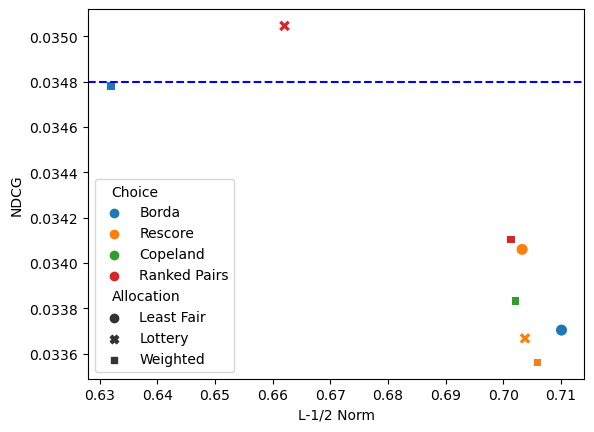

In [180]:
sb.scatterplot(data=plot_df, x='L-1/2 Norm', y='NDCG', style='Allocation', hue='Choice', s=75)
plt.axhline(y=0.0348, color='blue', linestyle='--')

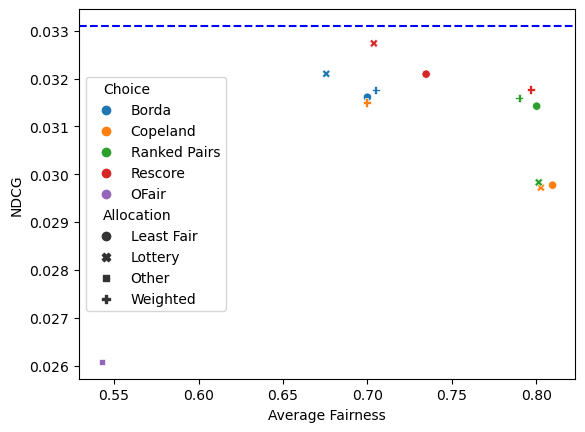

In [149]:
sb.scatterplot(data=plot_df, x='Average Fairness', y='NDCG', style='Allocation', hue='Choice')
plt.axhline(y=0.0331, color='blue', linestyle='--')

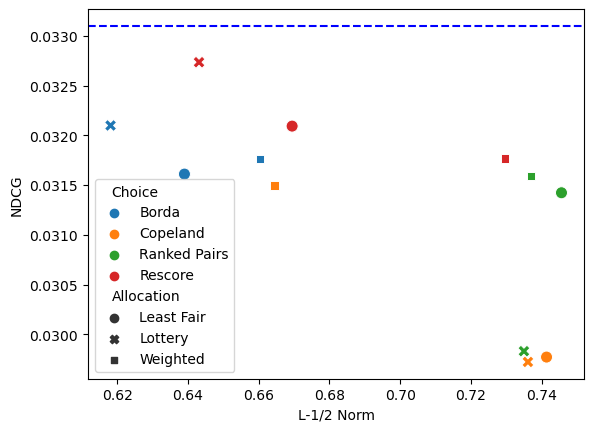

In [155]:
sb.scatterplot(data=plot_df, x='L-1/2 Norm', y='NDCG', style='Allocation', hue='Choice', s=75)
plt.axhline(y=0.0331, color='blue', linestyle='--')
plt.savefig('movies_scatter.pdf')